# **Pandas**
* filtering
* sorting
* useful methods
* groupby
* merge

In [11]:
import pandas as pd

data = {
    'roll no': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['John', 'Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy'],
    'Father name': ['John Sr.', 'Bob Sr.', 'Charlie Sr.', 'David Sr.', 'Eva Sr.', 'Frank Sr.', 'Grace Sr.', 'Hank Sr.', 'Ivy Sr.', 'Jack Sr.'],
    'course': ['Math', 'Physics', 'Chemistry', 'Physics', 'English', 'History', 'English', 'Economics', 'Art', 'Physical Education'],
    'date of admission': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [1000, 1200, 800, 1500, 2000, 1000, 1300, 1800, 900, 1000]
}

# Creating a DataFrame
df : pd.DataFrame = pd.DataFrame(data)

# Displaying the DataFrame
display(df)
display(df.info())


,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,History,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   roll no            10 non-null     int64 
 1   name               10 non-null     object
 2   Father name        10 non-null     object
 3   course             10 non-null     object
 4   date of admission  10 non-null     object
 5   fee                10 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


None

## **Apply the Filter or Filter Function on Dataframe**

In [12]:
df.course.value_counts()

course
Physics               2
English               2
Math                  1
Chemistry             1
History               1
Economics             1
Art                   1
Physical Education    1
Name: count, dtype: int64

In [13]:
df.course.value_counts(dropna=False) # also count null cells value

course
Physics               2
English               2
Math                  1
Chemistry             1
History               1
Economics             1
Art                   1
Physical Education    1
Name: count, dtype: int64

In [15]:
df.course.value_counts(dropna=False, normalize=True) # also count null cells value

course
Physics               0.2
English               0.2
Math                  0.1
Chemistry             0.1
History               0.1
Economics             0.1
Art                   0.1
Physical Education    0.1
Name: proportion, dtype: float64

In [16]:
df.course.value_counts(dropna=False, normalize=True)*100 # also count null cells value

course
Physics               20.0
English               20.0
Math                  10.0
Chemistry             10.0
History               10.0
Economics             10.0
Art                   10.0
Physical Education    10.0
Name: proportion, dtype: float64

In [17]:
df

,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,History,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


In [22]:
import pandas as pd

# Sample fee transaction data with 10 rows
fee_data = {
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [100, 150, 200, 120, 180, 2000, 130, 5000, 190, 210]
}

# Creating a DataFrame for fee transactions
fee_df : pd.DataFrame = pd.DataFrame(fee_data)

# Displaying the DataFrame
display(fee_df)


,date,fee
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,120
4,2023-01-05,180
5,2023-01-06,2000
6,2023-01-07,130
7,2023-01-08,5000
8,2023-01-09,190
9,2023-01-10,210


In [33]:
import pandas as pd

# Sample fee transaction data with 10 rows
fee_data = {
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [100, 150, 200, 120, 180, 220, 130, 170, 190, 210]
}

# Creating a DataFrame for fee transactions
fee_df = pd.DataFrame(fee_data)

# Correcting the bin edges
bins = [1, 100, 500, 1000, 3000, 4000, 5000]

# Using pd.cut with corrected bin edges
fee_df['fee_category'] = pd.cut(fee_df.fee, bins)

# Displaying the DataFrame
display(fee_df)


,date,fee,fee_category
0,2023-01-01,100,"(1, 100]"
1,2023-01-02,150,"(100, 500]"
2,2023-01-03,200,"(100, 500]"
3,2023-01-04,120,"(100, 500]"
4,2023-01-05,180,"(100, 500]"
5,2023-01-06,220,"(100, 500]"
6,2023-01-07,130,"(100, 500]"
7,2023-01-08,170,"(100, 500]"
8,2023-01-09,190,"(100, 500]"
9,2023-01-10,210,"(100, 500]"


In [36]:
import pandas as pd

# Sample fee transaction data with 10 rows
fee_data = {
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [100, 150, 200, 120, 180, 220, 130, 170, 190, 210]
}

# Creating a DataFrame for fee transactions
fee_df = pd.DataFrame(fee_data)

# Correcting the bin edges
bins = [1, 100, 500, 1000, 3000, 4000, 5000]

# Using pd.cut with corrected bin edges
fee_df['fee_category'] = pd.cut(fee_df.fee, bins).value_counts()

# Displaying the DataFrame
display(fee_df)


,date,fee,fee_category
0,2023-01-01,100,NaN
1,2023-01-02,150,NaN
2,2023-01-03,200,1.0
3,2023-01-04,120,1.0
4,2023-01-05,180,1.0
5,2023-01-06,220,1.0
6,2023-01-07,130,1.0
7,2023-01-08,170,1.0
8,2023-01-09,190,1.0
9,2023-01-10,210,1.0


In [37]:
import pandas as pd

# Sample fee transaction data with 10 rows
fee_data = {
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [100, 150, 2010, 120, 180, 2000, 130, 5000, 190, 210]
}

# Creating a DataFrame for fee transactions
fee_df = pd.DataFrame(fee_data)

# Correcting the bin edges
bins = [1, 100, 500, 1000, 3000, 4000, 5000]

# Using pd.cut with corrected bin edges
fee_df['fee_category'] = pd.cut(fee_df.fee, bins).value_counts(normalize=True)*100

# Displaying the DataFrame
display(fee_df)


,date,fee,fee_category
0,2023-01-01,100,NaN
1,2023-01-02,150,NaN
2,2023-01-03,2010,10.0
3,2023-01-04,120,10.0
4,2023-01-05,180,10.0
5,2023-01-06,2000,10.0
6,2023-01-07,130,10.0
7,2023-01-08,5000,10.0
8,2023-01-09,190,10.0
9,2023-01-10,210,10.0


# **Filter on Columns**
* &, |, ~ Syntax:
### `dataframe [(dataframe.column1=='value1') & (dataframe.column2=='value2')]`
* string columns
* numeric columns
* datetime columns

In [41]:
df.head(10)

,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,History,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


In [42]:
df['course']

0                  Math
1               Physics
2             Chemistry
3               Physics
4               English
5               History
6               English
7             Economics
8                   Art
9    Physical Education
Name: course, dtype: object

In [44]:
df['course']=='Physics'

0    False
1     True
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [46]:
df[df['course'] =='Physics']

,roll no,name,Father name,course,date of admission,fee
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
3,4,Charlie,David Sr.,Physics,2023-01-04,1500


### **Lower & Upper Case Issue**

In [47]:
import pandas as pd

data = {
    'roll no': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['John', 'Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy'],
    'Father name': ['John Sr.', 'Bob Sr.', 'Charlie Sr.', 'David Sr.', 'Eva Sr.', 'Frank Sr.', 'Grace Sr.', 'Hank Sr.', 'Ivy Sr.', 'Jack Sr.'],
    'course': ['Math', 'Physics', 'Chemistry', 'physics', 'English', 'Physics', 'English', 'Economics', 'Art', 'Physical Education'],
    'date of admission': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [1000, 1200, 800, 1500, 2000, 1000, 1300, 1800, 900, 1000]
}

# Creating a DataFrame
df : pd.DataFrame = pd.DataFrame(data)

# Displaying the DataFrame
display(df)
display(df.info())


,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,Physics,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   roll no            10 non-null     int64 
 1   name               10 non-null     object
 2   Father name        10 non-null     object
 3   course             10 non-null     object
 4   date of admission  10 non-null     object
 5   fee                10 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


None

In [48]:
df.head(10)

,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,Physics,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


In [49]:
df['course']

0                  Math
1               Physics
2             Chemistry
3               physics
4               English
5               Physics
6               English
7             Economics
8                   Art
9    Physical Education
Name: course, dtype: object

In [52]:
df['course']== 'physics'

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [53]:
df['course'].str.lower() == 'physics'

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [58]:
df[df['course'].str.lower() == 'physics']

,roll no,name,Father name,course,date of admission,fee
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
3,4,Charlie,David Sr.,physics,2023-01-04,1500
5,6,Eva,Frank Sr.,Physics,2023-01-06,1000


In [61]:
df['course'].str.lower().str.contains('cs')

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9    False
Name: course, dtype: bool

In [62]:
df[df['course'].str.lower().str.contains('cs')]

,roll no,name,Father name,course,date of admission,fee
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
3,4,Charlie,David Sr.,physics,2023-01-04,1500
5,6,Eva,Frank Sr.,Physics,2023-01-06,1000
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800


In [63]:
df['course'].str.lower().str.contains('cs') & df['course'].str.lower().str.contains('r')  

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [64]:
df['course'].str.lower().str.contains('cs') | df['course'].str.lower().str.contains('r')  

0    False
1     True
2     True
3     True
4    False
5     True
6    False
7     True
8     True
9    False
Name: course, dtype: bool

In [65]:
df[df['course'].str.lower().str.contains('cs') | df['course'].str.lower().str.contains('r')  ]

,roll no,name,Father name,course,date of admission,fee
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,physics,2023-01-04,1500
5,6,Eva,Frank Sr.,Physics,2023-01-06,1000
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900


### **Apply Filter on Date Column**
* dataframe.column.dt
* dt.strftime
* dt.strptime

In pandas, when you have a datetime column in a DataFrame, you can format the date and time information using the strftime method which allows for flexible formatting by specifying format codes. Each code represents a different element of the date and time. Below are some of the commonly used format codes that you can use with strftime:

* %A - Full weekday name.
* %a - Abbreviated weekday name.
* %w - Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
* %d - Day of the month as a zero-padded decimal number.
* %b - Abbreviated month name.
* %B - Full month name.
* %m - Month as a zero-padded decimal number.
* %y - Year without century as a zero-padded decimal number.
* %Y - Year with century as a decimal number.
* %H - Hour (24-hour clock) as a zero-padded decimal number.
* %I - Hour (12-hour clock) as a zero-padded decimal number.
* %p - Locale’s equivalent of either AM or PM.
* %M - Minute as a zero-padded decimal number.
* %S - Second as a zero-padded decimal number.
* %f - Microsecond as a decimal number, zero-padded on the left.
* %z - UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).
* %Z - Time zone name (empty string if the object is naive).
* %j - Day of the year as a zero-padded decimal number.
* %U - Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number.
* %W - Week number of the year (Monday as the first day of the week) as a zero-padded decimal number.
* %c - Locale’s appropriate date and time representation.
* %x - Locale’s appropriate date representation.
* %X - Locale’s appropriate time representation.
* %G - ISO 8601 year with century representing the year that contains the greater part of the ISO week (%V).
* %u - ISO 8601 weekday as a decimal number where 1 is Monday.
* %V - ISO 8601 week number as a decimal number with Monday as the first day of the week.

Here's a small example of how to use strftime with a pandas DataFrame:

import pandas as pd

## **Create a sample DataFrame with datetime column**
df = pd.DataFrame({
    'datetime': pd.date_range(start='2023-01-01', periods=3, freq='D')
})

## **Format the 'datetime' column as a string with a specific format**
df['formatted_date'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(df)
The 'formatted_date' column will contain strings representing the dates in the format specified by the strftime method. You can combine any of the symbols above to create the date format string as per your requirements.

In [72]:
import pandas as pd

data = {
    'roll no': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['John', 'Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy'],
    'Father name': ['John Sr.', 'Bob Sr.', 'Charlie Sr.', 'David Sr.', 'Eva Sr.', 'Frank Sr.', 'Grace Sr.', 'Hank Sr.', 'Ivy Sr.', 'Jack Sr.'],
    'course': ['Math', 'Physics', 'Chemistry', 'Physics', 'English', 'History', 'English', 'Economics', 'Art', 'Physical Education'],
    'date of admission': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [1000, 1200, 800, 1500, 2000, 1000, 1300, 1800, 900, 1000]
}

# Creating a DataFrame
df : pd.DataFrame = pd.DataFrame(data)

# Displaying the DataFrame
display(df)
display(df.info())


,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,History,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   roll no            10 non-null     int64 
 1   name               10 non-null     object
 2   Father name        10 non-null     object
 3   course             10 non-null     object
 4   date of admission  10 non-null     object
 5   fee                10 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


None

In [73]:
df

,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,History,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


In [74]:
df['date of admission']

0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
5    2023-01-06
6    2023-01-07
7    2023-01-08
8    2023-01-09
9    2023-01-10
Name: date of admission, dtype: object

In [91]:
df['date of admission'].dt.year
df['date of admission'].dt.month
df['date of admission'].dt.day
df['date of admission'].dt.weekday
df['date of admission'].dt.day_of_week
df['date of admission'].dt.hour
df['date of admission'].dt.minute
df['date of admission'].dt.second
df['date of admission'].dt.microsecond
df['date of admission'].dt.tz
df['date of admission'].dt.tz_localize
df['date of admission'].dt.tz_convert
df['date of admission'].dt.tz_localize(None)

0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
5   2023-01-06
6   2023-01-07
7   2023-01-08
8   2023-01-09
9   2023-01-10
Name: date of admission, dtype: datetime64[ns]

In [95]:
[i for i in dir(df['date of admission'].dt) if "_" not in i]

['ceil',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'tz',
 'unit',
 'weekday',
 'year']

In [93]:
from datetime import datetime

data: datetime = datetime.now()  # type: ignore

# Display the current date and time
print(data)


2023-11-14 15:26:32.721058


In [99]:
from datetime import datetime
import pandas as pd

# Get the current date and time
data: datetime = datetime.now()  # type: ignore

# Create a pandas Series using the correct variable name
s1: pd.Series = pd.Series([data])

# Display the Series
print(s1)


0   2023-11-14 15:35:13.339081
dtype: datetime64[ns]


In [101]:
s1.dt.strftime("%Y/%m %d %I %b %B") # convet from date to text 


0    2023/11 14 03 Nov November
dtype: object

In [102]:
s2 :pd.Series =  pd.Series(['01 Nov 2023', '01 Nov 2024', '01 Jan 2022'])
s2

0    01 Nov 2023
1    01 Nov 2024
2    01 Jan 2022
dtype: object

In [103]:
s2.apply(lambda x: datetime.strptime(x,"%d %b %Y") ) # string to datetime


0   2023-11-01
1   2024-11-01
2   2022-01-01
dtype: datetime64[ns]

# **Group by**
* dataframe.groupby(['column1', 'column2'])
* dataframe.groupby(['column1', 'column2'])[['co1','col2']].aggregate([min,max])
* dataframe.groupby(['column1', 'column2'])[['co1','col2']].apply(function())

In [1]:
import pandas as pd

data = {
    'roll no': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['John', 'Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy'],
    'Father name': ['John Sr.', 'Bob Sr.', 'Charlie Sr.', 'David Sr.', 'Eva Sr.', 'Frank Sr.', 'Grace Sr.', 'Hank Sr.', 'Ivy Sr.', 'Jack Sr.'],
    'course': ['Math', 'Physics', 'Chemistry', 'Physics', 'English', 'History', 'English', 'Economics', 'Art', 'Physical Education'],
    'date of admission': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'fee': [1000, 1200, 800, 1500, 2000, 1000, 1300, 1800, 900, 1000]
}

# Creating a DataFrame
df : pd.DataFrame = pd.DataFrame(data)

# Displaying the DataFrame
display(df)
display(df.info())


,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,History,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   roll no            10 non-null     int64 
 1   name               10 non-null     object
 2   Father name        10 non-null     object
 3   course             10 non-null     object
 4   date of admission  10 non-null     object
 5   fee                10 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


None

In [2]:
(df.groupby(['course']))

In [3]:
list((df.groupby(['course'])))

[(('Art',),
     roll no  name Father name course date of admission  fee
  8        9  Hank     Ivy Sr.    Art        2023-01-09  900),
 (('Chemistry',),
     roll no name  Father name     course date of admission  fee
  2        3  Bob  Charlie Sr.  Chemistry        2023-01-03  800),
 (('Economics',),
     roll no   name Father name     course date of admission   fee
  7        8  Grace    Hank Sr.  Economics        2023-01-08  1800),
 (('English',),
     roll no   name Father name   course date of admission   fee
  4        5  David     Eva Sr.  English        2023-01-05  2000
  6        7  Frank   Grace Sr.  English        2023-01-07  1300),
 (('History',),
     roll no name Father name   course date of admission   fee
  5        6  Eva   Frank Sr.  History        2023-01-06  1000),
 (('Math',),
     roll no  name Father name course date of admission   fee
  0        1  John    John Sr.   Math        2023-01-01  1000),
 (('Physical Education',),
     roll no name Father name        

In [4]:
list((df.groupby(['course'])))[0]

(('Art',),
    roll no  name Father name course date of admission  fee
 8        9  Hank     Ivy Sr.    Art        2023-01-09  900)

In [5]:
list((df.groupby(['course'])))[0][0]

('Art',)

In [7]:
for group in list(df.groupby(['course'])):
    display(group[0])
    display(group[1])
    print("================================================================")

('Art',)

,roll no,name,Father name,course,date of admission,fee
8,9,Hank,Ivy Sr.,Art,2023-01-09,900


('Chemistry',)

,roll no,name,Father name,course,date of admission,fee
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800


('Economics',)

,roll no,name,Father name,course,date of admission,fee
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800


('English',)

,roll no,name,Father name,course,date of admission,fee
4,5,David,Eva Sr.,English,2023-01-05,2000
6,7,Frank,Grace Sr.,English,2023-01-07,1300


('History',)

,roll no,name,Father name,course,date of admission,fee
5,6,Eva,Frank Sr.,History,2023-01-06,1000


('Math',)

,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000


('Physical Education',)

,roll no,name,Father name,course,date of admission,fee
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


('Physics',)

,roll no,name,Father name,course,date of admission,fee
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
3,4,Charlie,David Sr.,Physics,2023-01-04,1500


In [10]:
df

,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Physics,2023-01-04,1500
4,5,David,Eva Sr.,English,2023-01-05,2000
5,6,Eva,Frank Sr.,History,2023-01-06,1000
6,7,Frank,Grace Sr.,English,2023-01-07,1300
7,8,Grace,Hank Sr.,Economics,2023-01-08,1800
8,9,Hank,Ivy Sr.,Art,2023-01-09,900
9,10,Ivy,Jack Sr.,Physical Education,2023-01-10,1000


In [18]:
# Group by year and display groups
for group, group_df in df.groupby(df['date of admission'].dt.strftime("%B")):
    print(f"Group: {group}")
    display(group_df)
    print("================================================================")


Group: January


,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
3,4,Charlie,David Sr.,Biology,2022-01-04,1500
4,5,David,Eva Sr.,Computer Science,2022-01-05,2000


In [20]:
df.groupby([df['date of admission'].dt.strftime("%B"), df['course']])

In [21]:
# Group by year and display groups
for group, group_df in df.groupby([df['date of admission'].dt.strftime("%B"), df['course']]):
    print(f"Group: {group}")
    display(group_df)
    print("================================================================")

Group: ('January', 'Biology')


,roll no,name,Father name,course,date of admission,fee
3,4,Charlie,David Sr.,Biology,2022-01-04,1500


Group: ('January', 'Chemistry')


,roll no,name,Father name,course,date of admission,fee
2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800


Group: ('January', 'Computer Science')


,roll no,name,Father name,course,date of admission,fee
4,5,David,Eva Sr.,Computer Science,2022-01-05,2000


Group: ('January', 'Math')


,roll no,name,Father name,course,date of admission,fee
0,1,John,John Sr.,Math,2023-01-01,1000


Group: ('January', 'Physics')


,roll no,name,Father name,course,date of admission,fee
1,2,Alice,Bob Sr.,Physics,2023-01-02,1200


In [23]:
df.groupby(['course']).aggregate('count')

,roll no,name,Father name,date of admission,fee
course,,,,,
Biology,1,1,1,1,1
Chemistry,1,1,1,1,1
Computer Science,1,1,1,1,1
Math,1,1,1,1,1
Physics,1,1,1,1,1


In [25]:
from numpy import mean


df.groupby(['course'])[['fee']].agg([len,min, max])

C:\Users\LAPTOP POINT\AppData\Local\Temp\ipykernel_19032\2521322816.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby(['course'])[['fee']].agg([len,min, max])
C:\Users\LAPTOP POINT\AppData\Local\Temp\ipykernel_19032\2521322816.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby(['course'])[['fee']].agg([len,min, max])


fee            
                 len   min   max
course                          
Biology            1  1500  1500
Chemistry          1   800   800
Computer Science   1  2000  2000
Math               1  1000  1000
Physics            1  1200  1200

In [26]:
df.groupby(['course',df['date of admission'].dt.strftime("%B")])[['fee']].agg([len,min, max])


C:\Users\LAPTOP POINT\AppData\Local\Temp\ipykernel_19032\1420474260.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby(['course',df['date of admission'].dt.strftime("%B")])[['fee']].agg([len,min, max])
C:\Users\LAPTOP POINT\AppData\Local\Temp\ipykernel_19032\1420474260.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby(['course',df['date of admission'].dt.strftime("%B")])[['fee']].agg([len,min, max])


fee            
                                   len   min   max
course           date of admission                
Biology          January             1  1500  1500
Chemistry        January             1   800   800
Computer Science January             1  2000  2000
Math             January             1  1000  1000
Physics          January             1  1200  1200

In [28]:
df.groupby(['course']).apply(lambda x: x.head())

,,roll no,name,Father name,course,date of admission,fee
course,,,,,,,
Biology,3,4,Charlie,David Sr.,Biology,2022-01-04,1500
Chemistry,2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
Computer Science,4,5,David,Eva Sr.,Computer Science,2022-01-05,2000
Math,0,1,John,John Sr.,Math,2023-01-01,1000
Physics,1,2,Alice,Bob Sr.,Physics,2023-01-02,1200


In [31]:
df.groupby(['course']).apply(lambda x: x.head(1))


,,roll no,name,Father name,course,date of admission,fee
course,,,,,,,
Biology,3,4,Charlie,David Sr.,Biology,2022-01-04,1500
Chemistry,2,3,Bob,Charlie Sr.,Chemistry,2023-01-03,800
Computer Science,4,5,David,Eva Sr.,Computer Science,2022-01-05,2000
Math,0,1,John,John Sr.,Math,2023-01-01,1000
Physics,1,2,Alice,Bob Sr.,Physics,2023-01-02,1200


<Axes: xlabel='course'>

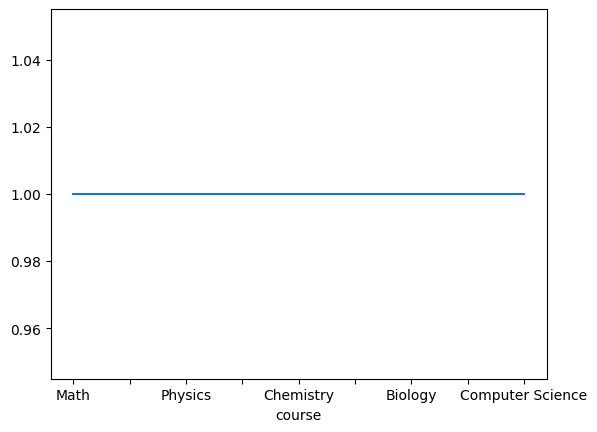

In [32]:
df.course.value_counts().plot()


<Axes: xlabel='course'>

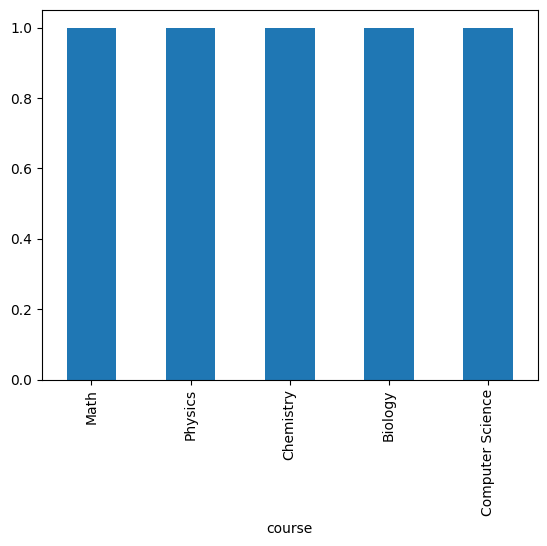

In [33]:
df.course.value_counts().plot(kind='bar')


<Axes: ylabel='proportion'>

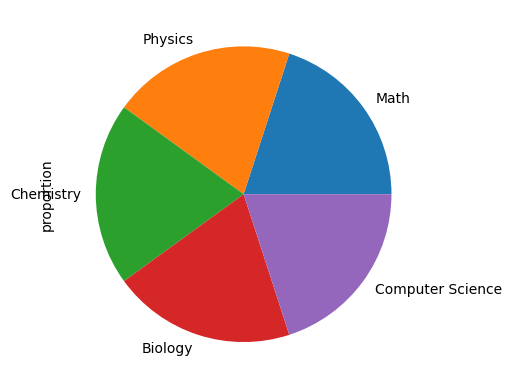

In [35]:
df.course.value_counts(normalize=True).plot(kind='pie')

C:\Users\LAPTOP POINT\AppData\Local\Temp\ipykernel_19032\1547550698.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby(['course'])[['fee']].aggregate([min, max, np.mean]).plot(kind='bar')
C:\Users\LAPTOP POINT\AppData\Local\Temp\ipykernel_19032\1547550698.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby(['course'])[['fee']].aggregate([min, max, np.mean]).plot(kind='bar')
C:\Users\LAPTOP POINT\AppData\Local\Temp\ipykernel_19032\1547550698.py:3: FutureWarning: The provided callable <function mean at 0x0000024D65ED0220> is currently using SeriesGroupBy.mean. In a future version of pandas, the pro

<Axes: xlabel='course'>

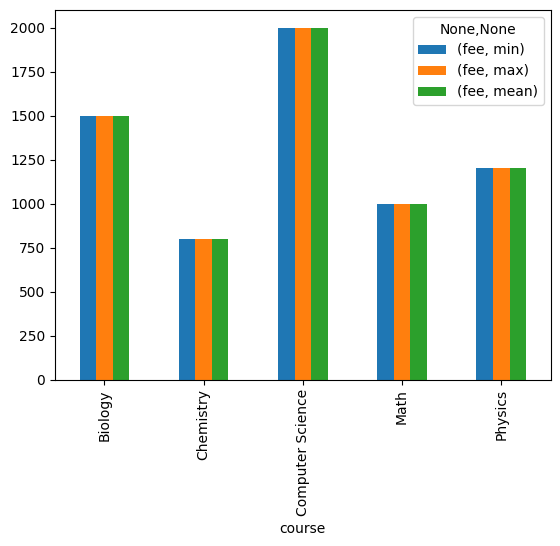

In [38]:
import numpy as np

df.groupby(['course'])[['fee']].aggregate([min, max, np.mean]).plot(kind='bar')


# **Data Wraggling**
* merge
* join
* pd.concat([df1,df2])

# **joining**
* left join,
* right join
* inner join
* outer join
* cross join

https://www.w3schools.com/sql/sql_join.asp



In [42]:
import pandas as pd

# Sample data for students
students_data = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['John', 'Alice', 'Bob', 'Charlie', 'David'],
    'course': ['Math', 'Physics', 'Chemistry', 'Biology', 'Computer Science'],
    'date_of_admission': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
}

students_df = pd.DataFrame(students_data)

# Sample data for teachers
teachers_data = {
    'teacher_id': [101, 102, 103, 104, 105],
    'teacher_name': ['Mr. Smith', 'Mrs. Johnson', 'Dr. Davis', 'Miss White', 'Mr. Brown'],
    'course_taught': ['Math', 'Physics', 'Chemistry', 'Biology', 'Computer Science'],
}

teachers_df = pd.DataFrame(teachers_data)

# Sample data for student fees
fees_data = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_amount': [1000, 1200, 800, 1500, 2000],
    'payment_date': ['2023-01-15', '2023-01-18', '2023-01-20', '2023-02-01', '2023-02-10'],
}

fees_df = pd.DataFrame(fees_data)

# Performing joins
# Merge students and student fees on student_id
merged_df = pd.merge(students_df, fees_df, on='student_id', how='left')

# Merge merged_df and teachers on course
final_df = pd.merge(merged_df, teachers_df, left_on='course', right_on='course_taught', how='left')

# Displaying the final DataFrame
display(final_df)

,student_id,name,course,date_of_admission,fee_amount,payment_date,teacher_id,teacher_name,course_taught
0,1,John,Math,2023-01-01,1000,2023-01-15,101,Mr. Smith,Math
1,2,Alice,Physics,2023-01-02,1200,2023-01-18,102,Mrs. Johnson,Physics
2,3,Bob,Chemistry,2023-01-03,800,2023-01-20,103,Dr. Davis,Chemistry
3,4,Charlie,Biology,2023-01-04,1500,2023-02-01,104,Miss White,Biology
4,5,David,Computer Science,2023-01-05,2000,2023-02-10,105,Mr. Brown,Computer Science


# joining columns properties
* same pattern of both columns
* same data types of both columns
* name can be different (columns)
* Merg
    * on
    * left_on
    * right_on
    * left_index=True
    * right_index=True
    * how
        * joining types
            * left
            * right
            * inner
            * outer
            * cross

In [50]:
students_df

,student_id,name,course,date_of_admission
0,1,John,Math,2023-01-01
1,2,Alice,Physics,2023-01-02
2,3,Bob,Chemistry,2023-01-03
3,4,Charlie,Biology,2023-01-04
4,5,David,Computer Science,2023-01-05


In [51]:
teachers_df

,teacher_id,teacher_name,course_taught
0,101,Mr. Smith,Math
1,102,Mrs. Johnson,Physics
2,103,Dr. Davis,Chemistry
3,104,Miss White,Biology
4,105,Mr. Brown,Computer Science


In [52]:
fees_df

,student_id,fee_amount,payment_date
0,1,1000,2023-01-15
1,2,1200,2023-01-18
2,3,800,2023-01-20
3,4,1500,2023-02-01
4,5,2000,2023-02-10


In [55]:
students_df.info()
teachers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   student_id         5 non-null      int64 
 1   name               5 non-null      object
 2   course             5 non-null      object
 3   date_of_admission  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   teacher_id     5 non-null      int64 
 1   teacher_name   5 non-null      object
 2   course_taught  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [56]:
display(students_df)
display(teachers_df)

,student_id,name,course,date_of_admission
0,1,John,Math,2023-01-01
1,2,Alice,Physics,2023-01-02
2,3,Bob,Chemistry,2023-01-03
3,4,Charlie,Biology,2023-01-04
4,5,David,Computer Science,2023-01-05


,teacher_id,teacher_name,course_taught
0,101,Mr. Smith,Math
1,102,Mrs. Johnson,Physics
2,103,Dr. Davis,Chemistry
3,104,Miss White,Biology
4,105,Mr. Brown,Computer Science


In [71]:
df1: pd.DataFrame = pd.merge(students_df, teachers_df, left_on='course', right_on='course_taught')
df1


,student_id,name,course,date_of_admission,teacher_id,teacher_name,course_taught
0,1,John,Math,2023-01-01,101,Mr. Smith,Math
1,2,Alice,Physics,2023-01-02,102,Mrs. Johnson,Physics
2,3,Bob,Chemistry,2023-01-03,103,Dr. Davis,Chemistry
3,4,Charlie,Biology,2023-01-04,104,Miss White,Biology
4,5,David,Computer Science,2023-01-05,105,Mr. Brown,Computer Science


In [76]:
df2 : pd.DataFrame = pd.merge(students_df, teachers_df, fees_df)
df2

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [86]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'teacher_id': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [87]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id")
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson


In [88]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='inner')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,4,David,101,Physics,Mr. Smith
2,2,Bob,102,Chem,Ms. Johnson


In [89]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='left')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,2,Bob,102,Chem,Ms. Johnson
2,3,Charlie,103,NaN,NaN
3,4,David,101,Physics,Mr. Smith
4,5,Eva,500,NaN,NaN


In [90]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='right')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1.0,Alice,101,Physics,Mr. Smith
1,4.0,David,101,Physics,Mr. Smith
2,2.0,Bob,102,Chem,Ms. Johnson
3,NaN,NaN,100,Maths,Dr. Lee


In [91]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, on="teacher_id", how='outer')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id,course_name,teacher_name
0,1.0,Alice,101,Physics,Mr. Smith
1,4.0,David,101,Physics,Mr. Smith
2,2.0,Bob,102,Chem,Ms. Johnson
3,3.0,Charlie,103,NaN,NaN
4,5.0,Eva,500,NaN,NaN
5,NaN,NaN,100,Maths,Dr. Lee


In [93]:
display(students)
display(teachers)

df1 : pd.DataFrame = pd.merge(students, teachers, how='cross')
print("Result")
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


Result


,student_id,name,teacher_id_x,teacher_id_y,course_name,teacher_name
0,1,Alice,101,101,Physics,Mr. Smith
1,1,Alice,101,102,Chem,Ms. Johnson
2,1,Alice,101,100,Maths,Dr. Lee
3,2,Bob,102,101,Physics,Mr. Smith
4,2,Bob,102,102,Chem,Ms. Johnson
5,2,Bob,102,100,Maths,Dr. Lee
6,3,Charlie,103,101,Physics,Mr. Smith
7,3,Charlie,103,102,Chem,Ms. Johnson
8,3,Charlie,103,100,Maths,Dr. Lee
9,4,David,101,101,Physics,Mr. Smith


# **if column name change in both dataframe**

In [94]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'tid': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [96]:
display(teachers)
display(students)

,tid,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


In [97]:
display(students)
display(teachers)

#                             left       right
df1 : pd.DataFrame = pd.merge(students, teachers, 
                              left_on="teacher_id",
                              right_on="tid",
                              how='inner')
df1

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


,tid,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,100,Maths,Dr. Lee


,student_id,name,teacher_id,tid,course_name,teacher_name
0,1,Alice,101,101,Physics,Mr. Smith
1,4,David,101,101,Physics,Mr. Smith
2,2,Bob,102,102,Chem,Ms. Johnson


In [98]:
import pandas as pd
from typing import Dict, Union, List

# Sample data for the 'students' DataFrame
students_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 101, 500]
}
students : pd.DataFrame = pd.DataFrame(students_data)

# Sample data for the 'teachers' DataFrame
teachers_data : Dict[str,List[Union[str,int]]] ={
    'tid': [101, 102, 100],
    'course_name':['Physics', 'Chem','Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}
teachers = pd.DataFrame(teachers_data)

# Sample data for the 'student_fees' DataFrame
student_fees_data : Dict[str,List[Union[str,int]]] = {
    'student_id': [1, 2, 2, 1, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}
student_fees = pd.DataFrame(student_fees_data)

In [99]:
display(student_fees)

,student_id,fee_paid
0,1,1500
1,2,1500
2,2,1500
3,1,1500
4,5,1500


In [100]:
df3: pd.DataFrame = student_fees.groupby("student_id").agg('sum')
df3

,fee_paid
student_id,
1,3000
2,3000
5,1500


In [101]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,101
4,5,Eva,500


In [102]:
df4 : pd.DataFrame  = pd.merge(students,df3,
                               left_on="student_id",
                                right_index=True,
                                 how='outer' )
df4

,student_id,name,teacher_id,fee_paid
0,1,Alice,101,3000.0
1,2,Bob,102,3000.0
2,3,Charlie,103,NaN
3,4,David,101,NaN
4,5,Eva,500,1500.0


In [104]:
pd.concat([students, teachers, student_fees]) # axis=0 #default value

,student_id,name,teacher_id,tid,course_name,teacher_name,fee_paid
0,1.0,Alice,101.0,NaN,NaN,NaN,NaN
1,2.0,Bob,102.0,NaN,NaN,NaN,NaN
2,3.0,Charlie,103.0,NaN,NaN,NaN,NaN
3,4.0,David,101.0,NaN,NaN,NaN,NaN
4,5.0,Eva,500.0,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,101.0,Physics,Mr. Smith,NaN
1,NaN,NaN,NaN,102.0,Chem,Ms. Johnson,NaN
2,NaN,NaN,NaN,100.0,Maths,Dr. Lee,NaN
0,1.0,NaN,NaN,NaN,NaN,NaN,1500.0
1,2.0,NaN,NaN,NaN,NaN,NaN,1500.0


In [106]:
pd.concat([students, teachers, student_fees], axis=1)

,student_id,name,teacher_id,tid,course_name,teacher_name,student_id,fee_paid
0,1,Alice,101,101.0,Physics,Mr. Smith,1,1500
1,2,Bob,102,102.0,Chem,Ms. Johnson,2,1500
2,3,Charlie,103,100.0,Maths,Dr. Lee,2,1500
3,4,David,101,NaN,NaN,NaN,1,1500
4,5,Eva,500,NaN,NaN,NaN,5,1500


In [1]:
x: int = 0
y: int = 4 
while x + y < 10:
    print(f"{x}", end="")
    x += 1

012345